In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pwd

/content/drive/My Drive/Colab_Notebooks


In [5]:
%cd drive/My\ Drive/Colab_Notebooks

[Errno 2] No such file or directory: 'drive/My Drive/Colab_Notebooks'
/content/drive/My Drive/Colab_Notebooks


In [6]:
import mpmath as mp
import math
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from mpmath import *
from mpl_toolkits.mplot3d import Axes3D
mp.dps = 15; mp.pretty = True
from numba import jit

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
#tf.__version__

# Custom activation function
from keras.layers import Activation
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects

In [12]:
def tf_coe(mlpr):
    weight_input = []
    weight_output = mlpr.layers[1].get_weights()[0]
    bias_input = mlpr.layers[0].get_weights()[1]
    bias_output = mlpr.layers[1].get_weights()[1]
    for i in range(dim):
        weight_input.append(mlpr.layers[0].get_weights()[0][i])
    return weight_input, weight_output, bias_input, bias_output

# sign of sigmoid integration
def addIndex(l):
    ret = []
    for v in l:
        ret.append(v+[0])
        ret.append(v+[1])
    return ret 

def sigs(l):
    return int((-1)**(sum(l)-len(l)))

def sig_lims(n):
    ret = [[]]
    for i in range(n):
        ret = addIndex(ret)
    if n%2==0:
        signs = [sigs(x) for x in ret]
    else:
        signs = [-1*sigs(x) for x in ret]
    return ret, signs
def sig_lims2(n):
    ret = [[]]
    for i in range(n):
        ret = addIndex(ret)
    if n%2==0:
        signs = [sigs(x) for x in ret]
    else:
        signs = [-1*sigs(x) for x in ret]
    return ret-np.array(0.5), signs
def sig_lims3(n):
    ret = [[]]
    for i in range(n):
        ret = addIndex(ret)
    if n%2==0:
        signs = [sigs(x) for x in ret]
    else:
        signs = [-1*sigs(x) for x in ret]
    return ret*np.array(0.2), signs

def sig_lims4(n):
    ret = [[]]
    for i in range(n):
        ret = addIndex(ret)
    if n%2==0:
        signs = [sigs(x) for x in ret]
    else:
        signs = [-1*sigs(x) for x in ret]
    return ret*np.array(0.8)+np.array(0.2), signs

def re_lims(n):
    ret = [[]]
    for i in range(n):
        ret = addIndex(ret)

    signs = [sigs(x) for x in ret]
    return ret, signs
def re_lims2(n):
    ret = [[]]
    for i in range(n):
        ret = addIndex(ret)

    signs = [sigs(x) for x in ret]
    return ret-np.array(0.5), signs

# numerical calculation of integral
# Sigmoid
def sig_integral(dim,fix,inp):
    vecpoly = np.vectorize(fp.polylog, signature='(),()->()', otypes=[float])
    if fix > 0:
        dim=dim-fix
        cons=np.dot(inp,weight_input[dim:])
        poly =[]
        for i in range(len(sig_lims(dim)[1])):
            weight=np.array(weight_input[:dim]).T*sig_lims(dim)[0][i]
            temp=sig_lims(dim)[1][i]*vecpoly(dim,-np.exp(-(bias_input+cons)-sum(weight.T)))
            poly.append(np.array(temp))
        sumpoly=np.sum(poly,axis=0)
        result=(bias_output+np.sum((1+sumpoly/np.prod(weight_input[:dim],axis=0))*weight_output.T,axis=1))
        return result
    else:
        poly =[]
        for i in range(len(sig_lims(dim)[1])):
            weight=np.array(weight_input[:dim]).T*sig_lims(dim)[0][i]
            temp=sig_lims(dim)[1][i]*vecpoly(dim,-np.exp(-bias_input-sum(weight.T)))
            poly.append(np.array(temp))
        sumpoly=np.sum(poly,axis=0)
        result=(bias_output+np.sum((1+sumpoly/np.prod(weight_input[:dim],axis=0))*weight_output.T))[0]
        return result
def sig_integral2(dim,fix,inp):
    vecpoly = np.vectorize(fp.polylog, signature='(),()->()', otypes=[float])
    if fix > 0:
        dim=dim-fix
        cons=np.dot(inp,weight_input[dim:])
        poly =[]
        for i in range(len(sig_lims2(dim)[1])):
            weight=np.array(weight_input[:dim]).T*sig_lims2(dim)[0][i]
            temp=sig_lims2(dim)[1][i]*vecpoly(dim,-np.exp(-(bias_input+cons)-sum(weight.T)))
            poly.append(np.array(temp))
        sumpoly=np.sum(poly,axis=0)
        result=(bias_output*1+np.sum((1+sumpoly/np.prod(weight_input[:dim],axis=0))*weight_output.T,axis=1))
        return result
    else:
        poly =[]
        for i in range(len(sig_lims(dim)[1])):
            weight=np.array(weight_input[:dim]).T*sig_lims(dim)[0][i]
            temp=sig_lims(dim)[1][i]*vecpoly(dim,-np.exp(-bias_input-sum(weight.T)))
            poly.append(np.array(temp))
        sumpoly=np.sum(poly,axis=0)
        result=(bias_output+np.sum((1+sumpoly/np.prod(weight_input[:dim],axis=0))*weight_output.T))[0]
        return result
def sig_integral3(dim,fix,inp):
    vecpoly = np.vectorize(fp.polylog, signature='(),()->()', otypes=[float])
    if fix > 0:
        dim=dim-fix
        cons=np.dot(inp,weight_input[dim:])
        poly =[]
        for i in range(len(sig_lims3(dim)[1])):
            weight=np.array(weight_input[:dim]).T*sig_lims3(dim)[0][i]
            temp=sig_lims3(dim)[1][i]*vecpoly(dim,-np.exp(-(bias_input+cons)-sum(weight.T)))
            poly.append(np.array(temp))
        sumpoly=np.sum(poly,axis=0)
        result=(bias_output*0.8**dim+np.sum((0.8**dim+sumpoly/np.prod(weight_input[:dim],axis=0))*weight_output.T,axis=1))
        return result
    else:
        poly =[]
        for i in range(len(sig_lims(dim)[1])):
            weight=np.array(weight_input[:dim]).T*sig_lims(dim)[0][i]
            temp=sig_lims(dim)[1][i]*vecpoly(dim,-np.exp(-bias_input-sum(weight.T)))
            poly.append(np.array(temp))
        sumpoly=np.sum(poly,axis=0)
        result=(bias_output+np.sum((1+sumpoly/np.prod(weight_input[:dim],axis=0))*weight_output.T))[0]
        return result
# Relu
def re_integral(dim,fix,inp):
    def relu(x):
        return np.clip(x,a_min=0.0, a_max=None)
    if fix > 0:
        temp=0
        dim=dim-fix # redefine dimension
        cons=np.dot(inp,weight_input[dim:]) # fixed variable makes to constant value
        for i in range(len(re_lims(dim)[1])):
            weight=np.array(weight_input[:dim]).T*re_lims(dim)[0][i] # weight input with boundaries
            temp+=re_lims(dim)[1][i]*1/np.prod(np.arange(dim+2)[1:])*relu(bias_input+cons+sum(weight.T))**(dim+1)/np.prod(weight_input[:dim],axis=0) # sum all weight input and bias input including boundaries
        result=(bias_output+np.sum((temp+1)*weight_output.T,axis=1)) # add bias output with weight output
        return result
    else:
        poly =[]
        temp=0
        for i in range(len(re_lims(dim)[1])):
            weight=np.array(weight_input[:dim]).T*re_lims(dim)[0][i]
            temp+=re_lims(dim)[1][i]*1/np.prod(np.arange(dim+2)[1:])*relu(bias_input+sum(weight.T))**(dim+1)/np.prod(weight_input,axis=0)
        result=(bias_output+np.sum((1+temp)*weight_output.T[0]))[0]
        return result

In [13]:
from sector_3 import I0 # import sector decompositioned function
data = np.loadtxt('sec2.txt') # get the data from text
values = data[:,4] # integrated value with Monte Carlo method
arguments = data[:,:3] # fixed variables values
def vec(x,y,z): # concatenate the single lists
    temp=[]
    for i in range(len(x)):
        temp.append([x[i],y[i],z[i]])
    return np.array(temp)

def sk_coe(mlpr): # get the coefficients of NN
    weight_input = []
    weight_output = mlpr.coefs_[1]
    bias_input = mlpr.intercepts_[0]
    bias_output = mlpr.intercepts_[1]
    for i in range(mlpr.coefs_[0].shape[0]):
        weight_input.append(mlpr.coefs_[0][i:i+1][0])
    return weight_input, weight_output, bias_input, bias_output

def relulb(x,y):
    # mlpregression with relu activation with changed hyperparameter lbfgs
    mlp_sec1 = MLPRegressor(hidden_layer_sizes=(k,),
                           max_iter = 1000000000,activation = 'relu',
                           solver = 'adam',alpha=1000,
                           learning_rate_init=0.0007, tol=1e-15)
    # fitting NN
    mlp_sec1.fit(x, y)
    return mlp_sec1

def siglb(x,y):
    # mlpregression with relu activation with changed hyperparameter lbfgs
    mlp_sec1_l = MLPRegressor(hidden_layer_sizes=(k,),
                           max_iter = 1000000000,activation = 'logistic',
                           solver = 'adam',shuffle=True,
                           learning_rate_init=0.005, tol=1e-15)
    # fitting NN
    mlp_sec1_l.fit(x, y)
    mlp_sec1_l = MLPRegressor(hidden_layer_sizes=(k,),
                           max_iter = 1000000000,activation = 'logistic',
                           solver = 'adam',shuffle=True,warm_start=True,
                           learning_rate_init=0.003, tol=1e-15)
    # fitting NN
    mlp_sec1_l.fit(x, y)
    return mlp_sec1_l

def digit(analy,numeric): # get the correct digits
    return -np.log10(abs((analy-numeric)/analy))

def xnorm(x,ymin,ymax): # normalising x value with setted range
    xs = np.empty_like(x)
    xs[:] = x[:]
    for i in range(x.shape[1]):
        xs[:,i]=(ymax-ymin)/(np.max(x[:,i])-np.min(x[:,i]))*(x[:,i]-np.min(x[:,i]))+ymin
    return xs
def inpnorm(inp,mx,ymin,ymax): # input arguments normalisation
    xs=inp
    for i in range(len(inp)):
        xs[i]=(ymax-ymin)/(mx[i]-mx[i+1])*(inp[i]-mx[i+1])+ymin
    return xs
def fnorm(f,ymin,ymax): # normalising y value with setted range
    return (ymax-ymin)/(np.max(f)-np.min(f))*(f-np.min(f))+ymax
def denorm(x,f,I,ymin,ymax): # denormalise the integrated value
    mx=[]
    for i in range(x.shape[1]):
        mx.append(np.max(x[:,i])-np.min(x[:,i]))
    vs=np.prod(mx)
    vss=(ymax-ymin)**x.shape[1]
    return(vs*(np.max(f)-np.min(f)))/(vss*(ymax-ymin))*I+(np.min(f)-(np.max(f)-np.min(f))/(ymax-ymin)*ymin)*vs
def re_integral2(dim,fix,inp):
    def relu(x):
        return np.clip(x,a_min=0.0, a_max=None)
    if fix > 0:
        temp=0
        dim=dim-fix # redefine dimension
        cons=np.dot(inp,weight_input[dim:]) # fixed variable makes to constant value
        for i in range(len(re_lims(dim)[1])):
            weight=np.array(weight_input[:dim]).T*re_lims2(dim)[0][i] # weight input with boundaries
            temp+=re_lims2(dim)[1][i]*1/np.prod(np.arange(dim+2)[1:])*relu(bias_input+cons+sum(weight.T))**(dim+1)/np.prod(weight_input[:dim],axis=0) # sum all weight input and bias input including boundaries
        result=(bias_output+np.sum((temp+1)*weight_output.T,axis=1)) # add bias output with weight output
        return result
    else:
        poly =[]
        temp=0
        for i in range(len(re_lims(dim)[1])):
            weight=np.array(weight_input[:dim]).T*re_lims(dim)[0][i]
            temp+=re_lims(dim)[1][i]*1/np.prod(np.arange(dim+2)[1:])*relu(bias_input+sum(weight.T))**(dim+1)/np.prod(weight_input,axis=0)
        result=(bias_output+np.sum(temp*weight_output.T[0]))[0]
        return result
def keras_sig(x,y):
    model = keras.Sequential([
        keras.layers.Dense(k, activation='sigmoid'),
        keras.layers.Dense(1)
    ])
    model.compile(
        loss=tf.keras.losses.mae,
        optimizer='adam',
        metrics=['mae']
    )
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)
    model.fit(x, y, epochs=90)
    return model

def keras_re(x,y):
    model2 = keras.Sequential([
        keras.layers.Dense(k, activation='relu'),
        keras.layers.Dense(1)
    ])
    model2.compile(
        loss=tf.keras.losses.mae,
        optimizer='adam',
        metrics=['mae']
    )
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)
    model2.fit(x, y, epochs=90)
    return model2

300000
[[ 5.35427166e-01  2.05775381e-01  4.12105758e-01 -1.10258107e+01
  -2.47420174e+01 -2.24279155e+01]
 [ 4.60792204e-01  8.32946608e-01  2.46605815e-02 -2.34304209e+01
  -2.87481953e+01 -9.48811485e+00]
 [ 3.34187858e-01  5.39697701e-01  5.09338900e-02 -1.75660918e+01
  -1.86216888e+01 -2.58355241e+01]
 ...
 [ 2.61980467e-01  5.20480926e-01  9.29022149e-01 -8.22429076e+00
  -1.49758146e+01 -2.77082952e+01]
 [ 9.46331562e-01  8.67656037e-01  2.81047121e-01 -1.60753970e+01
  -1.03099482e+01 -1.46904938e+01]
 [ 9.85897371e-01  1.95214096e-01  5.83305212e-01 -2.43185775e+01
  -2.89879901e+01 -1.57607950e+01]]
[0.0036186  0.00304063 0.00829427 ... 0.00067539 0.00173211 0.00124702]


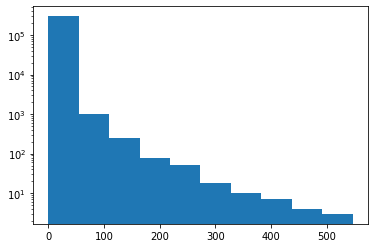

In [9]:
low = np.array([0,0,0,-30,-30,-30]) # set the minimum range of random variables
high = np.array([1,1,1,-3,-3,-3]) # set the maximum range of random variables
vari2 = np.random.random(size=(300_000,6)) # set the size of random value
vari2 = vari2*(high-low)+low # make the random variables to setted range
#N=100000 # size of variables
#x1=np.linspace(0,1,N) # uniform variables
#x2=np.linspace(0,1,N) # uniform variables
#x3=np.linspace(0,1,N) # uniform variables
#ar1 = np.linspace(-3, -30, N) # uniform variables
#ar2 = np.linspace(-3, -30, N) # uniform variables
#ar3 = np.linspace(-3, -30, N) # uniform variables
#xx=vec(x1,x2,x3)
#ar=vec(ar1,ar2,ar3)
#vari2=np.concatenate((xx,ar),axis=1)


Y=[]
Y2=[]
X=vari2

for i in range(X.shape[0]):
    Y2.append(I0(X[i,:3],X[i,3:],[])/(I0(np.array([1/2]*(3)),X[i,3:],[]))) # make hypercube
    Y.append(I0(X[i,:3],X[i,3:],[])) # normal Y values
Y=np.array(Y)
Y2=np.array(Y2)

print(len(Y))

dmin, dmax = Y.min(),Y.max() 
dmin2, dmax2 = Y2.min(),Y2.max()
dmean, dstd = Y.mean(),Y.std()
dmean2, dstd2 = Y2.mean(),Y2.std()
plt.hist(Y2)
plt.yscale('log')

imean = np.array([0.5,0.5,0.5,-16.5,-16.5,-16.5]) # mean of x values
iscale = np.array([1,1,1,27,27,27]) # scale of x values

print(X)
print(Y)
Xn=(X-imean)/iscale # normalising
Yn=(Y-dmean)/dstd # normalising
Yn2=(Y2-dmean2)/dstd2 # normalising the hypercube Y value

Xs=xnorm(X,0,1) # normalising paper method 
Ys=fnorm(Y,0,1) # normalising paper method
Ys2=fnorm(Y2,0,1) # normalising paper method
#vari2=np.concatenate((xx,ar),axis=1)
#X=vari2

In [10]:
k = 125 # set the node number
dim = 6 # set the dimension

net1=keras_sig(X,Y2)

Epoch 1/90
9375/9375 [==============================] - 22s 2ms/step - loss: 1.5835 - mae: 1.5835
Epoch 2/90
9375/9375 [==============================] - 18s 2ms/step - loss: 0.8744 - mae: 0.8744
Epoch 3/90
9375/9375 [==============================] - 17s 2ms/step - loss: 0.6160 - mae: 0.6160
Epoch 4/90
9375/9375 [==============================] - 17s 2ms/step - loss: 0.5094 - mae: 0.5094
Epoch 5/90
9375/9375 [==============================] - 21s 2ms/step - loss: 0.4420 - mae: 0.4420
Epoch 6/90
9375/9375 [==============================] - 17s 2ms/step - loss: 0.3970 - mae: 0.3970
Epoch 7/90
9375/9375 [==============================] - 17s 2ms/step - loss: 0.3620 - mae: 0.3620
Epoch 8/90
9375/9375 [==============================] - 17s 2ms/step - loss: 0.3360 - mae: 0.3360
Epoch 9/90
9375/9375 [==============================] - 17s 2ms/step - loss: 0.3137 - mae: 0.3137
Epoch 10/90
9375/9375 [==============================] - 17s 2ms/step - loss: 0.2972 - mae: 0.2972
Epoch 11/90
9375/93

In [14]:
k=125
dim=6
net2=keras_sig(X,Y2)

Epoch 1/90
9375/9375 [==============================] - 17s 2ms/step - loss: 1.5937 - mae: 1.5937
Epoch 2/90
9375/9375 [==============================] - 17s 2ms/step - loss: 0.8834 - mae: 0.8834
Epoch 3/90
9375/9375 [==============================] - 17s 2ms/step - loss: 0.6270 - mae: 0.6270
Epoch 4/90
9375/9375 [==============================] - 17s 2ms/step - loss: 0.5189 - mae: 0.5189
Epoch 5/90
9375/9375 [==============================] - 17s 2ms/step - loss: 0.4495 - mae: 0.4495
Epoch 6/90
9375/9375 [==============================] - 17s 2ms/step - loss: 0.4026 - mae: 0.4026
Epoch 7/90
9375/9375 [==============================] - 17s 2ms/step - loss: 0.3666 - mae: 0.3666
Epoch 8/90
9375/9375 [==============================] - 17s 2ms/step - loss: 0.3393 - mae: 0.3393
Epoch 9/90
9375/9375 [==============================] - 17s 2ms/step - loss: 0.3161 - mae: 0.3161
Epoch 10/90
9375/9375 [==============================] - 17s 2ms/step - loss: 0.2965 - mae: 0.2965
Epoch 11/90
9375/93

In [15]:
net3=keras_sig(X,Y2)

Epoch 1/90
9375/9375 [==============================] - 17s 2ms/step - loss: 1.5799 - mae: 1.5799
Epoch 2/90
9375/9375 [==============================] - 17s 2ms/step - loss: 0.8761 - mae: 0.8761
Epoch 3/90
9375/9375 [==============================] - 17s 2ms/step - loss: 0.6172 - mae: 0.6172
Epoch 4/90
9375/9375 [==============================] - 17s 2ms/step - loss: 0.5046 - mae: 0.5046
Epoch 5/90
9375/9375 [==============================] - 17s 2ms/step - loss: 0.4384 - mae: 0.4384
Epoch 6/90
9375/9375 [==============================] - 18s 2ms/step - loss: 0.3927 - mae: 0.3927
Epoch 7/90
9375/9375 [==============================] - 18s 2ms/step - loss: 0.3594 - mae: 0.3594
Epoch 8/90
9375/9375 [==============================] - 18s 2ms/step - loss: 0.3350 - mae: 0.3350
Epoch 9/90
9375/9375 [==============================] - 18s 2ms/step - loss: 0.3139 - mae: 0.3139
Epoch 10/90
9375/9375 [==============================] - 17s 2ms/step - loss: 0.2941 - mae: 0.2941
Epoch 11/90
9375/93

KeyboardInterrupt: ignored

In [ ]:
net4=keras_sig(X,Y2)

In [ ]:
net5=keras_sig(X,Y2)

In [ ]:
net6=keras_sig(Xn,Yn2)

In [ ]:
net7=keras_re(X,Y2)

In [ ]:
net8=keras_re(Xn,Yn2)

In [12]:
norm_val=[]
for i in range(len(values)):
    norm_val.append(values[i]/(I0(np.array([1/2]*(3)),arguments[i,],[]))) # make hypercube

In [27]:
weight_input, weight_output, bias_input, bias_output = tf_coe(net1)
ans=[]
for i in range(len(arguments)):
    ans.append(sig_integral2(6,3,arguments[i])[0])
weight_input, weight_output, bias_input, bias_output = tf_coe(net2)
ans2=[]
for i in range(len(arguments)):
    ans2.append(sig_integral3(6,3,arguments[i])[0])


[0.20417210421955692, 0.2139609053325972, 0.22387882443875456]
[0.42436495089224147, 0.42650964029622324, 0.42927377601621564]
[0.62853706 0.64047055 0.6531526 ]
[1.99102850484288, 2.054491462448514, 2.122011925851489]


(array([ 2.4642123 ,  2.22952541,  2.22952541,  4.02879154,  3.52030328,
         4.77196667,  4.73285219,  5.71071422,  6.06274454,  6.88414864,
         6.68857624,  8.09669755,  8.214041  ,  8.91810165,  9.77862023,
        10.09153608, 11.46054291, 11.34319947, 12.7122063 , 14.3550145 ,
        14.74615931, 16.31073855, 19.51812598, 21.16093418, 23.07754375,
        27.49748009, 33.16907983, 38.64510716, 43.10415798, 47.36763641,
        50.18387903, 55.93370773, 58.20234762, 58.78906484, 59.41489653,
        58.71083587, 56.98979871, 58.12411866, 57.06802768, 59.6886979 ,
        32.62147709, 11.30408499,  4.18524946,  2.34686886,  1.36900683,
         1.05609099,  0.50848825,  0.35203033,  0.1955724 ,  0.15645792]),
 array([0.11802415, 0.11897104, 0.11991793, 0.12086482, 0.12181171,
        0.12275859, 0.12370548, 0.12465237, 0.12559926, 0.12654615,
        0.12749303, 0.12843992, 0.12938681, 0.1303337 , 0.13128059,
        0.13222747, 0.13317436, 0.13412125, 0.13506814, 0.136015

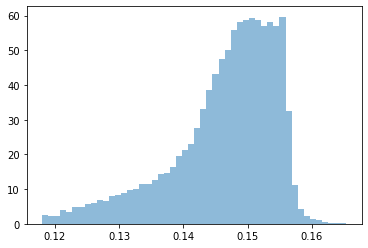

In [28]:
ans3=np.array(ans)+np.array(ans2)
print(ans[:3])
print(ans2[:3])
print(ans3[:3])
print(norm_val[:3])
digits=digit(np.array(norm_val),ans3)
plt.hist(digits,bins=50, density=True, alpha=0.5)

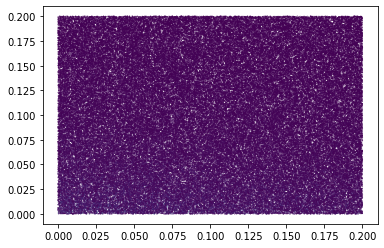

In [33]:
plt.scatter(X[:,0],X[:,1],X[:,2],Y2)
#plt.scatter(X[:,0],net1.predict(X))

#plt.scatter(X2[:,0],Y3)
#plt.scatter(X2[:,0],net2.predict(X2))
plt.show()
#print(Y2[-5:])
#print(Y3[:5])

(array([3.94950843e-02, 1.10586236e-01, 3.00162641e-01, 4.52455686e-01,
        5.66833450e-01, 8.13598736e-01, 1.07710994e+00, 9.74422719e-01,
        8.15494500e-01, 6.74576040e-01, 5.40924674e-01, 4.41081101e-01,
        3.81996455e-01, 2.95107270e-01, 2.28439567e-01, 1.91156208e-01,
        1.32387523e-01, 1.06794708e-01, 8.37295787e-02, 7.93061292e-02,
        5.02377472e-02, 4.10748877e-02, 3.25439494e-02, 2.27491685e-02,
        1.73778371e-02, 1.39022697e-02, 9.16285955e-03, 9.47882023e-03,
        7.89901686e-03, 4.42344944e-03, 3.47556742e-03, 2.52768539e-03,
        1.26384270e-03, 2.21172472e-03, 1.57980337e-03, 1.57980337e-03,
        9.47882023e-04, 9.47882023e-04, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.15960674e-04, 0.00000000e+00, 0.00000000e+00,
        3.15960674e-04, 6.31921348e-04, 3.15960674e-04, 0.00000000e+00,
        0.00000000e+00, 3.15960674e-04]),
 array([1.35194825, 1.46916865, 1.58638905, 1.70360946, 1.82082986,
        1.93805026, 2.0552

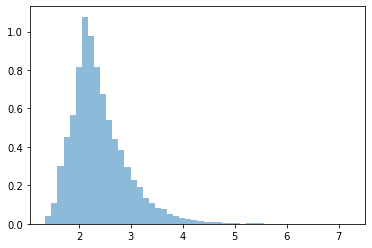

In [34]:
weight_input, weight_output, bias_input, bias_output = tf_coe(net)
ans2=[]
for i in range(len(arguments)):
    ans2.append(sig_integral(6,3,arguments[i])[0])
digits2=digit(np.array(norm_val),np.array(ans2))
plt.hist(digits2,bins=50, density=True, alpha=0.5)

In [35]:
print(k)

125


In [27]:
normalised_val=values[0]/(I0(np.array([1/2]*(3)),arguments[0],[])) # Hypercube value of answer

inp=np.loadtxt('sec2.txt')[0,:3] # get the input value
inp=(inp-imean[3:])/iscale[3:] # normalise the input value
#inp=inpnorm(inp,mx,0,1)
print(inp)
weight_input, weight_output, bias_input, bias_output = tf_coe(nets2) # get the weight and bias values
ans=re_integral2(6,3,inp)[0]*dstd2+dmean2 # integral of relu  and denormalising
ans2=denorm(X,Y,ans,0,1) # denormalising of paper method
print(ans)
print(re_integral(6,3,inp)[0]*dstd2+dmean2)
#print(ans2)
print('normalised_val',normalised_val)
#print(data[-1,4])
print(digit(normalised_val,ans))
print(weight_input)

[0.49962963 0.49925926 0.49888889]


NameError: ignored

[[0.998999 0.5      0.6      1.       1.       1.      ]
 [1.       0.5      0.6      1.       1.       1.      ]]


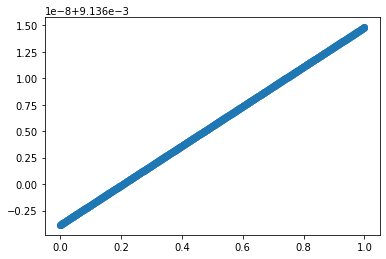

0.00913601481899286
[0.00913601 0.00913601]


In [66]:
xx = np.empty(shape=(1000,6))
xx[:,0] = np.linspace(0,1,1000)
xx[:,1:] = [0.5,0.6,1,1,1]
print(xx[-2:,:])


y=a1.predict(xx)
plt.scatter(xx[:,0],y)
plt.show()
print(np.max(y))
print(a1.predict(xx[-2:,:]))
#y2=a2.predict(xx)
#plt.scatter(xx[:,0],y2)
#plt.show()
#print(np.max(y2))

[[0.998999 0.5      0.6      1.       1.       1.      ]
 [1.       0.5      0.6      1.       1.       1.      ]]


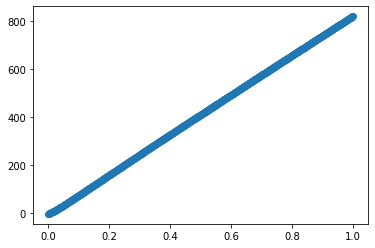

819.1044
[[818.28595]
 [819.1044 ]]


In [47]:
xx = np.empty(shape=(1000,6))
xx[:,0] = np.linspace(0,1,1000)
xx[:,1:] = [0.5,0.6,1,1,1]
print(xx[-2:,:])


y=nets2.predict(xx)
plt.scatter(xx[:,0],y)
plt.show()
print(np.max(y))
print(nets2.predict(xx[-2:,:]))
#y2=a2.predict(xx)
#plt.scatter(xx[:,0],y2)
#plt.show()
#print(np.max(y2))

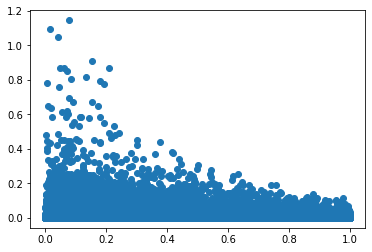

In [85]:
plt.scatter(X[:,0],Y)
plt.show()

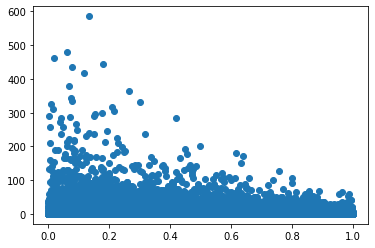

In [86]:
plt.scatter(X[:,0],Y2)
plt.show()

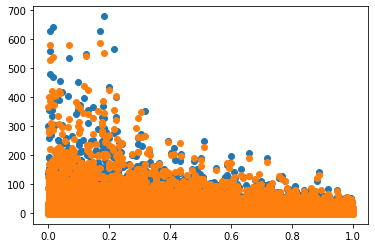

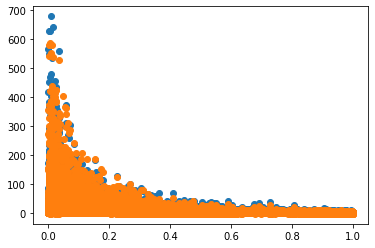

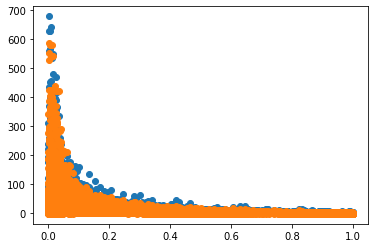

In [18]:
plt.scatter(X[:,0],Y2)
#y=nets2.predict(X)
y2=a1.predict(X)
#plt.scatter(X[:,0],y)
plt.scatter(X[:,0],y2)
plt.show()

plt.scatter(X[:,1],Y2)
plt.scatter(X[:,1],y2)
plt.show()

plt.scatter(X[:,2],Y2)
plt.scatter(X[:,2],y2)
plt.show()

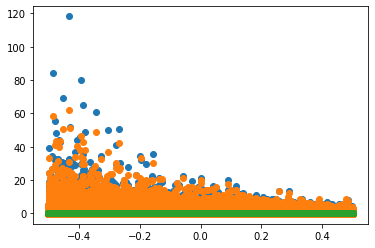

62.23396
[0.01167966 0.01167834 0.01167837 ... 0.01167843 0.01167941 0.01167896]


In [153]:
plt.scatter(Xn[:,0],Yn2)
y=nets2.predict(Xn)
y2=a1.predict(Xn)
plt.scatter(Xn[:,0],y)
plt.scatter(Xn[:,0],y2)
plt.show()
print(np.max(y))
print(y2)

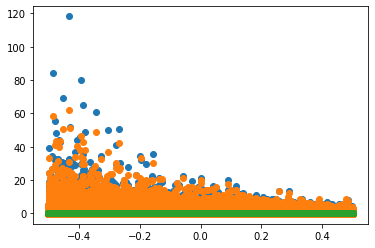

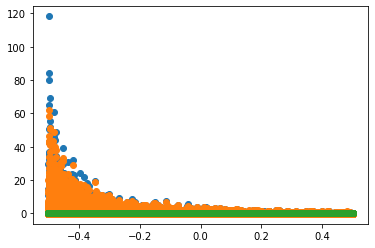

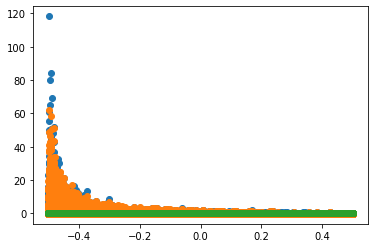

In [154]:
plt.scatter(Xn[:,0],Yn2)
plt.scatter(Xn[:,0],y)
plt.scatter(Xn[:,0],y2)
plt.show()
plt.scatter(Xn[:,1],Yn2)
plt.scatter(Xn[:,1],y)
plt.scatter(Xn[:,1],y2)
plt.show()
plt.scatter(Xn[:,2],Yn2)
plt.scatter(Xn[:,2],y)
plt.scatter(Xn[:,2],y2)
plt.show()